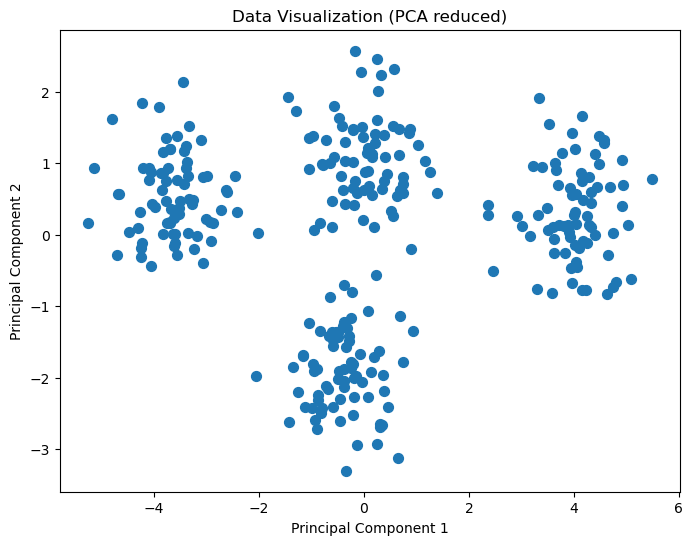

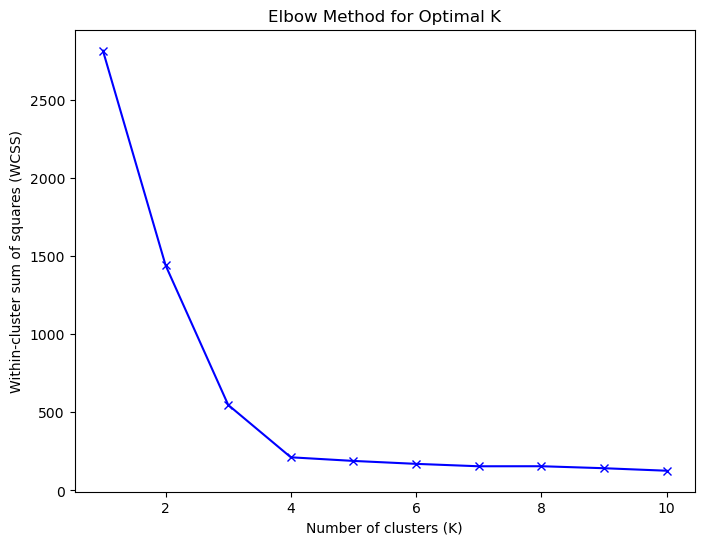

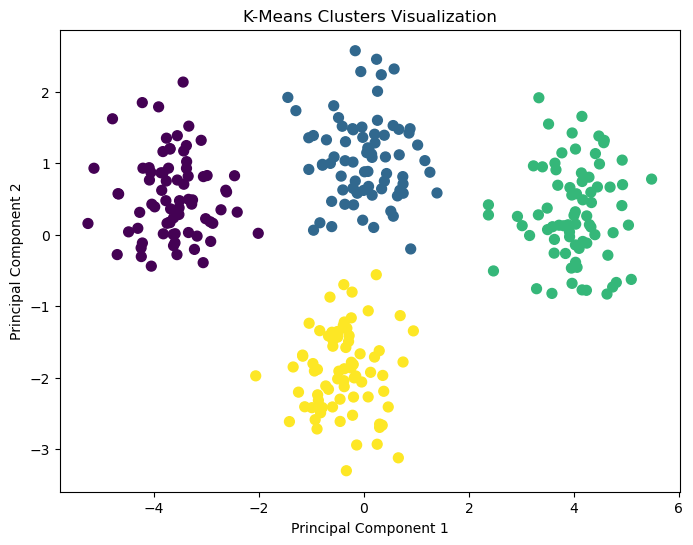

Silhouette Score for k=4: 0.682


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Step 1: Load your dataset

from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
data = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

#  Optional - Visualize data (use PCA to reduce to 2D if high-dimensional)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.title('Data Visualization (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Use Elbow Method to find best K
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Select optimal K based on the plot
optimal_k = 4  # Adjust based on the elbow plot
#  Fit K-Means with optimal K and assign labels
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to original data
data['Cluster'] = cluster_labels

#  Visualize clusters with PCA components
reduced_clusters = pca.transform(data.drop('Cluster', axis=1))
plt.figure(figsize=(8, 6))
plt.scatter(reduced_clusters[:, 0], reduced_clusters[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualization')
plt.show()

# Evaluate clustering using Silhouette Score
score = silhouette_score(data.drop('Cluster', axis=1), cluster_labels)
print(f'Silhouette Score for k={optimal_k}: {score:.3f}')
